In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
import os
import glob
import keras
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,GlobalAveragePooling2D,GlobalMaxPool2D,MaxPooling2D,MaxPool2D,Dropout
from keras.models import Model,Sequential

2024-05-30 13:31:00.893727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Ensuring tensorflow is running on local machine
# Ignore
print(tf.__version__)

2.16.1


In [4]:
# finding filepath for cropped data
os.listdir('../Resources/cropped/train')

['n02097658-silky_terrier',
 'n02092002-Scottish_deerhound',
 'n02099849-Chesapeake_Bay_retriever',
 'n02091244-Ibizan_hound',
 'n02095314-wire-haired_fox_terrier',
 'n02091831-Saluki',
 'n02102318-cocker_spaniel',
 'n02104365-schipperke',
 'n02090622-borzoi',
 'n02113023-Pembroke',
 'n02105505-komondor',
 'n02093256-Staffordshire_bullterrier',
 'n02113799-standard_poodle',
 'n02109961-Eskimo_dog',
 'n02089973-English_foxhound',
 'n02099601-golden_retriever',
 'n02095889-Sealyham_terrier',
 'n02085782-Japanese_spaniel',
 'n02097047-miniature_schnauzer',
 'n02110063-malamute',
 'n02105162-malinois',
 'n02086079-Pekinese',
 'n02097130-giant_schnauzer',
 'n02113978-Mexican_hairless',
 'n02107142-Doberman',
 'n02097209-standard_schnauzer',
 'n02115913-dhole',
 'n02106662-German_shepherd',
 'n02106382-Bouvier_des_Flandres',
 'n02110185-Siberian_husky',
 'n02094258-Norwich_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02109525-Saint_Bernard',
 'n02093754-Border_terri

In [5]:
# finding all images under Chihuahua
glob.glob('../Resources/cropped/train/n02085620-Chihuahua/*')

['../Resources/cropped/train/n02085620-Chihuahua/n02085620_4700.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_712.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_9351.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_1916.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_2614.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_3093.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_4515.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_3681.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_275.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_473.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_4266.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_3928.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_11238.jpg',
 '../Resources/cropped/train/n02085620-Chihuahua/n02085620_477.jpg',
 '../Resources/cropped/

In [6]:
# finding all images under beagle
glob.glob('../Resources/cropped/train/n02088364-beagle/*')

['../Resources/cropped/train/n02088364-beagle/n02088364_12397.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_14095.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_8871.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_12816.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_6109.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_1128.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_12745.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_9825.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_16721.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_2019.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_4052.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_16695.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_8443.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364_14055.jpg',
 '../Resources/cropped/train/n02088364-beagle/n02088364

In [7]:
import cv2
import warnings
warnings.simplefilter('ignore')

In [8]:
# assign image filepath to variable
img = cv2.imread('../Resources/cropped/train/n02085620-Chihuahua/n02085620_275.jpg')

(224, 224, 3)


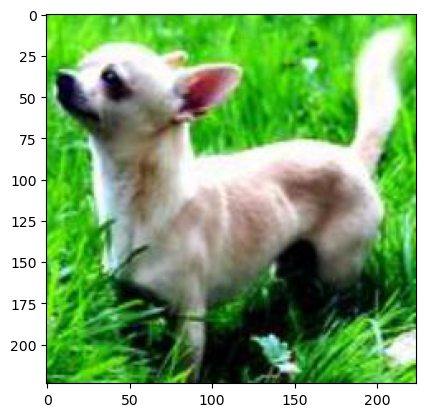

In [9]:
# show the image and print the dimensions of the photo
# doing this to ensure interaction with data is operating correctly

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
print(img.shape)

In [10]:
# grabbing sample of another photo of another dog
img = cv2.imread('../Resources/cropped/train/n02088364-beagle/n02088364_1128.jpg')

(224, 224, 3)


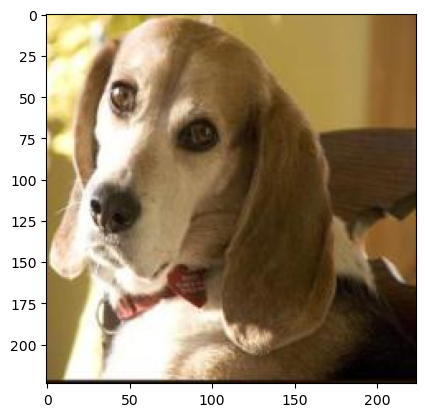

In [11]:
# show the image and print the dimensions of the photo

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
print(img.shape)

In [12]:
# more dependencies! 
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [13]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

In [14]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

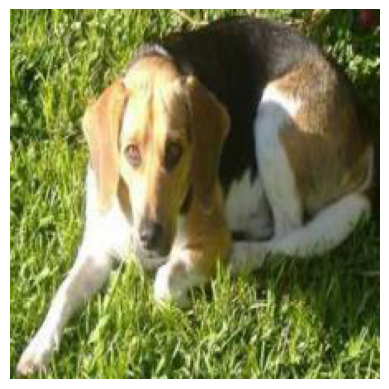

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

# Trying to run model prediction with photo of beagle
image_size = (224, 224, 3)
image_path = "../Resources/cropped/train/n02088364-beagle/n02088364_3758.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (224, 224)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


In [22]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted: [[('n02088364', 'beagle', 0.61499655), ('n02089867', 'Walker_hound', 0.13061132), ('n02089973', 'English_foxhound', 0.07414254)]]


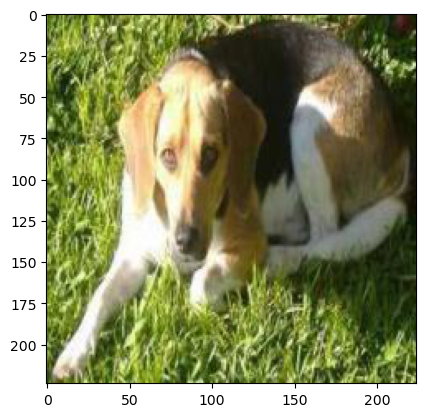

In [23]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

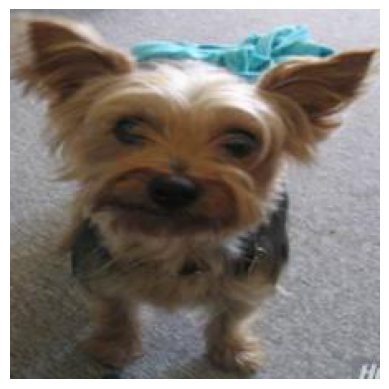

In [24]:
# testing data model with a dog that is easily recognizable (Yorkshire Terrior)
image_size = (224, 224, 3)
image_path = "../Resources/cropped/train/n02094433-Yorkshire_terrier/n02094433_515.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (224, 224)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [25]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted: [[('n02094433', 'Yorkshire_terrier', 0.9465255), ('n02097658', 'silky_terrier', 0.027001236), ('n02096294', 'Australian_terrier', 0.016599417)]]


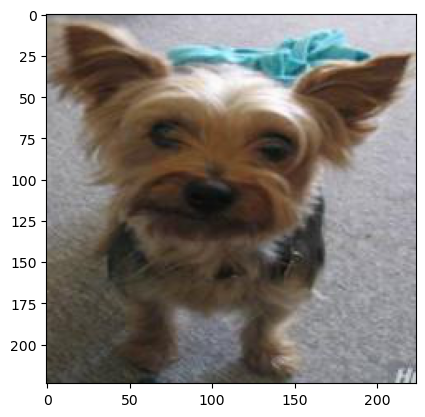

In [26]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [27]:
results = decode_predictions(predictions)[0]
dic = [{'breed': res[1], 'prediction': res[2]} for res in results]

import pandas as pd

__df = pd.DataFrame(dic)

__df.head()

,breed,prediction
0,Yorkshire_terrier,0.946526
1,silky_terrier,0.027001
2,Australian_terrier,0.016599
3,toy_terrier,0.004414
4,Norfolk_terrier,0.001563


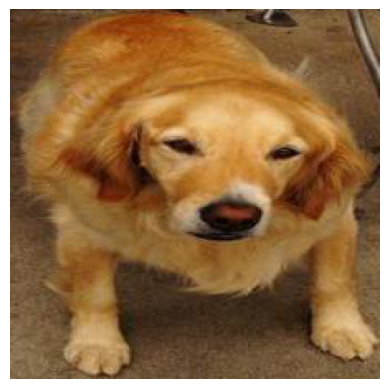

In [28]:
# testing data model with a golden retriever
image_size = (224, 224, 3)
image_path = "../Resources/cropped/train/n02099601-golden_retriever/n02099601_704.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (224, 224)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [29]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted: [[('n02099601', 'golden_retriever', 0.80197674), ('n02099712', 'Labrador_retriever', 0.07616181), ('n02086079', 'Pekinese', 0.025237134)]]


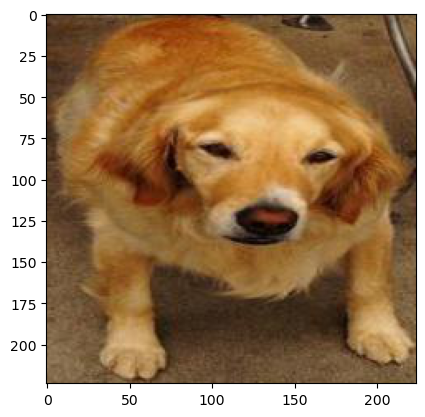

In [30]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [32]:
# prepare the dataframe of results and write to csv
file_path = "../Outputs/vgg19_model.csv"
__df.to_csv(file_path, index=False)
print(f"DataFrame wrote to csv successfully. ")

DataFrame wrote to csv successfully. 
